<h1 style="color:green; margin-bottom:15px;font-size:30px">Gaming Online Store Sales Analysis</h1>

# Project Description

You work for an online store, which sells computer games all over the world. Historical game sales data, user and expert ratings, genres and platforms (such as Xbox or PlayStation) are available from open sources. You need to identify the patterns that determine the success of the game. This will allow you to bid on a potentially popular product and plan advertising campaigns.<br>

Here is the data up to 2016. Let's say it's December 2016 and you're planning a campaign for 2017. It is necessary to work out the principle of working with data. It doesn't matter if you are forecasting 2017 sales based on 2016 data or 2027 based on 2026 data.<br>

The abbreviation ESRB (Entertainment Software Rating Board) is an association that determines the age rating of computer games in the data set. 

# Contents
<ol>
<li>Libraries Import</li>
<li>Data Import</li>
<li>Data Description </li>
<li>Data Preparation</li>
<li>Exploratory Data Analysis</li>
<li>Buyer Portraits</li>
<li>Hypotheses Testing</li>
<li>Conclusion and Recommendations</li>
</ol>

# 1. Libraries Import

In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Import

In [2]:
data=pd.read_csv('games.csv')

display(data.head(5))
display(data.info())
data.describe().T

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


Let's check for duplicates

In [3]:
duplicates = data[data.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score, Rating]
Index: []


# 3. Data Description

The dataset has incomplete data on computer games sales of online store for 2016.<br>
The data contains 16715 games (without duplicates) and 11 variables describing them:

*Text variables*
<li> Name - game name, 16713 non-null objects</li>

*Categorical variables*
<li> Rating - ESRB rating that determines the age category of the game, 9949 non-null string objects</li>
<li> Platform - platform, 16715 non-null string objects</li>
<li> Year_of_Release — year of release, 16446 non-null, type: float64</li>
<li> Genre — game genre, 16713 non-null string objects</li>

*Quantitative Continuous Variables*
<li> NA_sales - sales in North America (millions sold), 16715 non-null, type: float64</li>
<li> EU_sales - sales in Europe (millions sold), 16715 non-null, type: float64</li>
<li> JP_sales - sales in Japan (millions sold), 16715 non-null, type: float64</li>
<li> Other_sales - sales in other countries (millions of copies sold), 16715 non-null, type: float64</li>
<li> Critic_Score - Critics score (max 100), 8137 non-null, type: float64</li>
<li> User_Score - user score (maximum 10), 10014 non-null, string objects</li>


# 4. Data Preparation
<ol>
<li>Lowercasing the column names</li>
<li>Dealing with gaps</li>
<li>Converting types where needed</li>
<li>Calculating total sales</li>
</ol>

In [4]:
data.columns = data.columns.str.lower()
print('Checking for gap values')
print(data.isna().sum())

Checking for gap values
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Removing 2 games with names missing

In [5]:
data['name'].fillna(0, inplace=True)
data.drop(data[data['name'] == 0].index, inplace=True)
data = data.reset_index(drop=True) 

The gaps in critic_score (8578), year_of_release (269), user_score (6701), rating (6766) and the "tbd" value in the user_score variable can be explained by the fact that the data taken from the open sources has not been updated since it was imported into the store's database. <br>

Let's remove all gaps in the year_of_release values (1.6% of the dataset).<br>

Let's replace all gaps in the values of critic_score (8578), user_score (6701) with zeros.<br>
Let's replace all the "tbd" values in the user_score variable with 0 as well.<br>

Let's convert critic_score, year_of_release to an integer type, user_score to a float type, and leave the rating unchanged.<br>

In future, we will work with the data subsets necessary to solve each specific problem, and we will keep in mind these zeros and gaps so that they won't affect the results of the analysis.<br>

In [6]:
data['critic_score'].fillna(0, inplace=True)
data['year_of_release'].fillna(0, inplace=True)
data['user_score'].fillna(0, inplace=True)
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0

data.dropna(subset=['year_of_release'])

data['critic_score'] = data['critic_score'].astype('int64')
data['year_of_release'] = data['year_of_release'].astype('int64')
data['user_score'] = data['user_score'].astype('float64')

Checking the values of platform, genre и rating

In [7]:
print(data['rating'].value_counts().count())
print(data['rating'].value_counts())

8
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64


In [8]:
print(data['platform'].value_counts().count())
print(data['platform'].value_counts())

31
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64


In [9]:
print(data['genre'].value_counts().count())
print(data['genre'].value_counts())

12
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64


The data contains games in 12 genres and 8 age categories released on 31 platforms. <br>
There are no missing values, garbage or duplicates among genres and platforms. <br>
Among the age categories there is no garbage and duplicates. <br>

From the 75% percentile and the maximum for each sales measure, we can see that the game data contains outliers with extremely high sales. Let's experimentally determine the alpha sales threshold for eu_sales, jp_sales, other_sales (and 2 alpha for na_sales, as for all stats, sales in the states are on average twice as high as in the other regions) to remove no more than 2% of the data. We will remove them from the dataset so that they won't affect the analysis.

In [10]:
data.describe().T

alpha = 1.4

a = len(data)
print ('Values in the dataset: {}'.format(a))
print ('Alpha threshold  {}'.format(alpha))

sample = data.loc[data['na_sales'] > alpha*2]
print ('Outliers in na_sales at a given threshold {:.0%}'.format(len(sample)/a))

sample = data.loc[data['eu_sales'] > alpha]
print ('Outliers in eu_sales at a given threshold {:.0%}'.format(len(sample)/a))

sample = data.loc[data['jp_sales'] > alpha]
print ('Outliers in jp_sales at a given threshold {:.0%}'.format(len(sample)/a))

sample = data.loc[data['other_sales'] > alpha]
print ('Outliers in other_sales at a given threshold {:.0%}'.format(len(sample)/a))

data.drop(data[data['na_sales'] > alpha*2].index, inplace=True)
data.drop(data[data['eu_sales'] > alpha].index, inplace=True)
data.drop(data[data['jp_sales'] > alpha].index, inplace=True)
data.drop(data[data['other_sales'] > alpha].index, inplace=True)
data = data.reset_index(drop=True)

b = len(data)

print ('{:.0%}'.format(b/a))

Values in the dataset: 16713
Alpha threshold  1.4
Outliers in na_sales at a given threshold 1%
Outliers in eu_sales at a given threshold 2%
Outliers in jp_sales at a given threshold 1%
Outliers in other_sales at a given threshold 0%
98%


Calculating total sales for all regions:

In [11]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [12]:
print('Dataset successfully preprocessed')
display(data.head(5))
print(data.isna().sum())

Dataset successfully preprocessed


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,New Super Mario Bros. U,WiiU,2012,Platform,2.30,1.34,1.27,0.32,84,8.1,E,5.23
1,Resident Evil,PS,1996,Action,2.05,1.16,1.11,0.73,91,9.0,M,5.05
2,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,0,0.0,NaN,4.87
3,God of War III,PS3,2010,Action,2.74,1.33,0.12,0.61,92,8.7,M,4.80
4,Animal Crossing: City Folk,Wii,2008,Simulation,1.82,1.12,1.32,0.36,73,7.6,E,4.62


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6615
total_sales           0
dtype: int64


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16315.0,1973.707141,254.654620,0.0,2003.00,2007.00,2010.00,2016.00
na_sales,16315.0,0.194807,0.337319,0.0,0.00,0.07,0.22,2.78
eu_sales,16315.0,0.097671,0.191494,0.0,0.00,0.02,0.10,1.40
jp_sales,16315.0,0.052712,0.144466,0.0,0.00,0.00,0.03,1.40
other_sales,16315.0,0.032521,0.070535,0.0,0.00,0.01,0.03,1.33
critic_score,16315.0,33.132700,35.537699,0.0,0.00,0.00,70.00,98.00
user_score,16315.0,3.200221,3.678112,0.0,0.00,0.00,7.30,9.70
total_sales,16315.0,0.377711,0.567418,0.0,0.06,0.16,0.43,5.23


# 5. Exploratory Data Analysis
<ol>
<li>How many games were released over the years. Is data for all periods important?</li>
<li>Analyse the platforms with the highest total sales. How long does it take for new platforms to appear and old ones to disappear?</li>
<li>Which platforms are leading in sales, and which are getting more or less popular? Choose a few potentially profitable platforms.</li>
<li>Plot a boxplots of global game sales by platform. </li>
<li>How sales within one popular platform are affected by user and critic reviews. Plot a scatterplot and calculate the correlation between reviews and sales. </li>
<li>Look at the overall distribution of games by genre. What about the most profitable genres? </li>
</ol>

Games released before 1994 4%


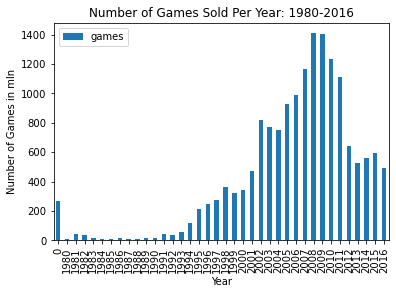

In [14]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='year_of_release',ascending=True).plot(kind='bar', label='games').set(xlabel='Year', ylabel='Number of Games in mln')
plt.legend(["games"])
plt.title('Number of Games Sold Per Year: 1980-2016')

sample = data.loc[data['year_of_release'] < 1994]
print ('Games released before 1994 {:.0%}'.format(len(sample)/len(data)))
data.drop(data[data['year_of_release'] < 1994].index, inplace=True)

The distribution of the number of released games by year is similar to normal distribution.<br>
The release peak falls on 2008-2009 (about 1400 games each). <br>We've removed all games released before 1994 (2% of data). <br>Now the observation period contains 13 years: 1994 - 2016.

Text(0.5, 1.0, 'Number of Games Sold Per Year: 1994-2016')

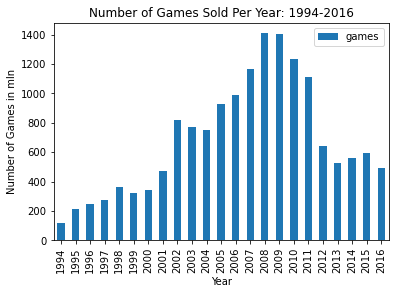

In [15]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='year_of_release',ascending=True).plot(kind='bar').set(xlabel='Year', ylabel='Number of Games in mln')
plt.legend(["games"])
plt.title('Number of Games Sold Per Year: 1994-2016')

Let's see how sales are changing from platform to platform.

Text(0.5, 1.0, 'Total Sales in mln copies per Platform: 1994-2016')

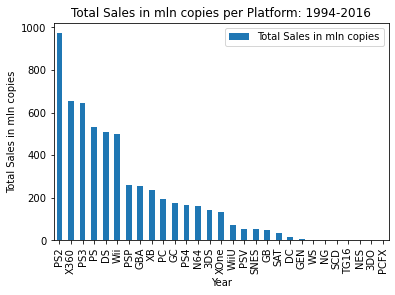

In [16]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False).plot(kind='bar').set(xlabel='Year', ylabel='Total Sales in mln copies')
plt.legend(["Total Sales in mln copies"])
plt.title('Total Sales in mln copies per Platform: 1994-2016')

Let's choose 6 platforms with the highest total sales and plot the distribution by years.

In [17]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False).head(6)

,total_sales
platform,
PS2,972.41
X360,653.71
PS3,646.20
PS,531.99
DS,509.89
Wii,497.18


Top selling platforms in 13 years of observation: PS2, X360, PS3, PS, DS, Wii.<br>
There are 3 PlayStation platforms among top 6 platforms.

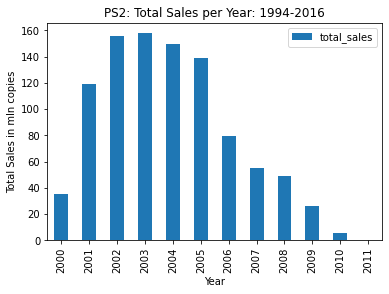

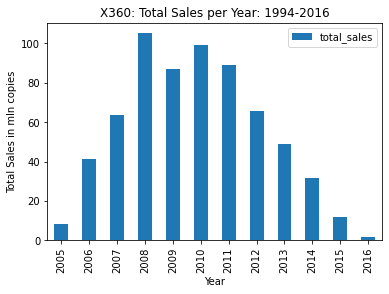

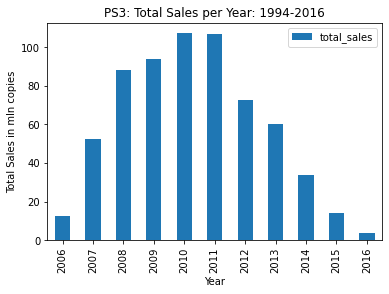

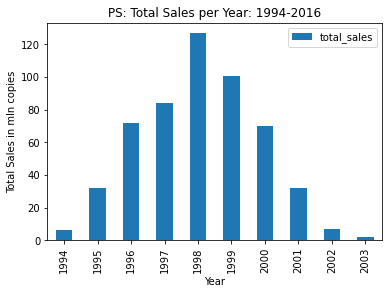

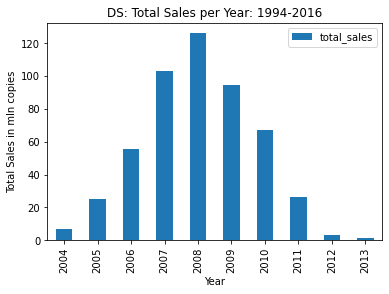

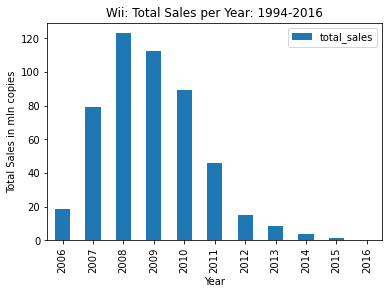

In [18]:
# Код ревьюера

platform_list = ['PS2','X360','PS3','PS','DS','Wii']

for pl in platform_list:
    data.loc[data['platform'] == pl].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release',ascending=True).plot(kind='bar').set(xlabel='Year', ylabel='Total Sales in mln copies')
    plt.title(pl + ': Total Sales per Year: 1994-2016')

The graphs show that total sales in popular platforms first grow, reach a peak, and then fall.<br>
The life cycle of a gaming platform is 10-11 years. Platforms reach peak sales in 5-6 years.<br>
New PS platforms are released every 6 years, just after the previous platform's peak sales has ended.

Let's introduce the actual_data variable with data for 2011-2016, it will help us show what phase of the life cycle the platforms are at in 2016

In [19]:
actual_data = data.loc[data['year_of_release'] > 2010]
len(actual_data)

3921

Let's build global sales graphs by years for all platforms

Text(0.5, 1.0, 'Total Sales per Platform per Year: 2011-2016')

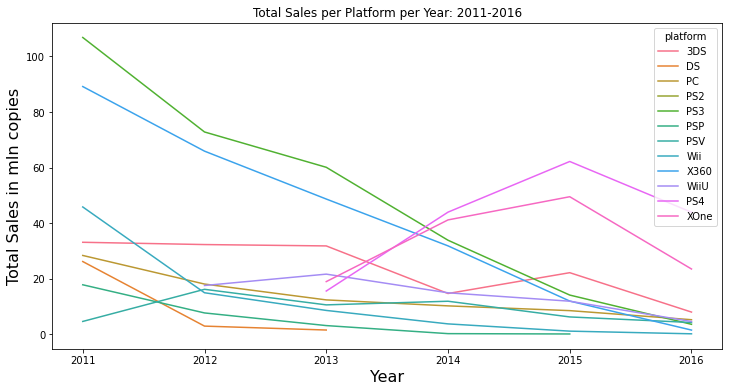

In [20]:
pivot = actual_data.pivot_table(index=['year_of_release', 'platform'], values='total_sales', aggfunc='sum')
pivot = pivot.reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=pivot)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Total Sales in mln copies',fontsize=16)
plt.title('Total Sales per Platform per Year: 2011-2016')

In [21]:
print(pivot.loc[pivot['year_of_release'] == 2016].sort_values(by='total_sales',ascending=False))

    year_of_release platform  total_sales
52             2016      PS4        43.92
57             2016     XOne        23.50
49             2016      3DS         8.00
50             2016       PC         5.25
55             2016     WiiU         4.60
53             2016      PSV         4.25
51             2016      PS3         3.60
56             2016     X360         1.52
54             2016      Wii         0.18


Judging by the graphs, the sales peak for all platforms from our dataset has already passed in 2016, all platforms are falling and there are no promising platforms. The most popular platfroms in 2016 are PS4 (43.92 million copies) and XOne (23.50 million copies).

Let's build boxplots of total sales by platform.

Text(0.5, 1.0, 'Total Sales per Platform: 2011-2016')

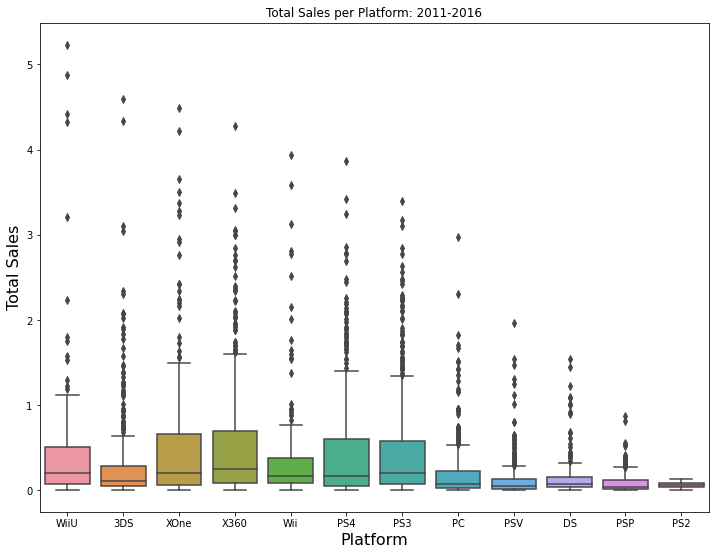

In [22]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='platform', y='total_sales', data = actual_data)
plt.xlabel('Platform',fontsize=16)
plt.ylabel('Total Sales',fontsize=16)
plt.title('Total Sales per Platform: 2011-2016')

The outliers show that all platforms (except PS2) have successful games with abnormally high sales.<br>
From 2011 to 2016, X360, XOne, PS4, PS3, and WiiU lead global sales. And 3DS, PC, DS, PSP, PSV, PS2 are lagging behind.

Let's see how the user reviews and critic reviews affect the sales of X360 games. Let's build a scatterplot and calculate the correlation between reviews and sales.

0.5069976994422002
0.2192067275514546


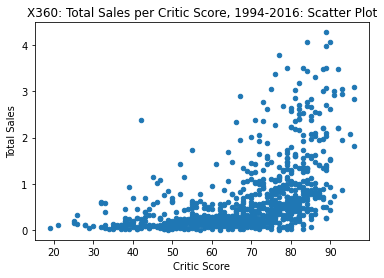

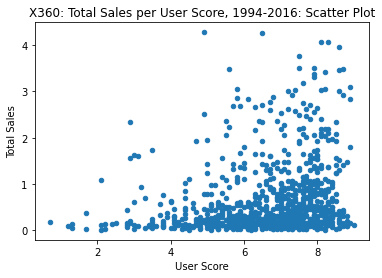

In [23]:
x360_critic = data.loc[(data['platform'] == 'X360') & (data['critic_score'] > 0)]
x360_user = data.loc[(data['platform'] == 'X360') & (data['user_score'] > 0)]

x360_critic.plot(x='critic_score', y='total_sales', kind='scatter').set(xlabel='Critic Score', ylabel='Total Sales')
plt.title('X360: Total Sales per Critic Score, 1994-2016: Scatter Plot')

x360_user.plot(x='user_score', y='total_sales', kind='scatter').set(xlabel='User Score', ylabel='Total Sales')
plt.title('X360: Total Sales per User Score, 1994-2016: Scatter Plot')

print(x360_critic['critic_score'].corr(x360_critic['total_sales']))
print(x360_user['user_score'].corr(x360_user['total_sales']))


There is a weak direct correlation between user reviews (0.22) and X360 game sales and a 2.3 times stronger correlation between critic reviews (0.5) and X360 game sales.

Let's also check 2 popular platforms (XOne, PS4) and 2 unpopular platforms (DS, PSP) for the correlation of reviews and sales.

0.395623364019281
-0.04645477316353189


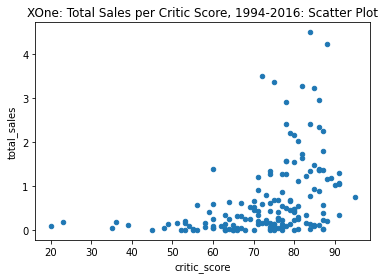

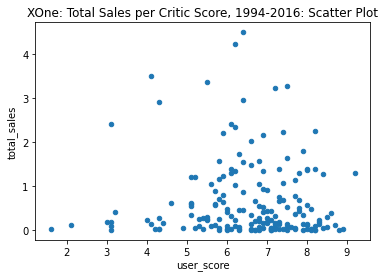

In [24]:
xone_critic = data.loc[(data['platform'] == 'XOne') & (data['critic_score'] > 0)]
xone_user = data.loc[(data['platform'] == 'XOne') & (data['user_score'] > 0)]

xone_critic.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('XOne: Total Sales per Critic Score, 1994-2016: Scatter Plot')

xone_user.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('XOne: Total Sales per Critic Score, 1994-2016: Scatter Plot')

print(xone_critic['critic_score'].corr(xone_critic['total_sales']))
print(xone_user['user_score'].corr(xone_user['total_sales']))

0.3698834664826908
0.031040425773764993


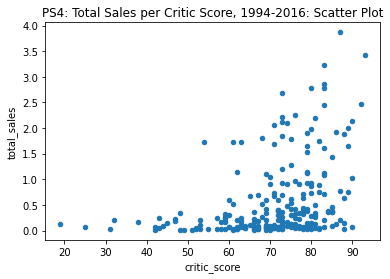

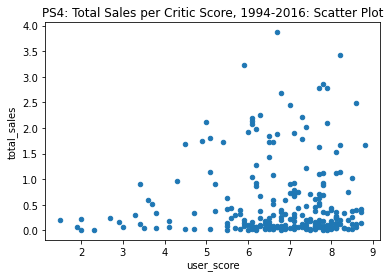

In [25]:
ps4_critic = data.loc[(data['platform'] == 'PS4') & (data['critic_score'] > 0)]
ps4_user = data.loc[(data['platform'] == 'PS4') & (data['user_score'] > 0)]

ps4_critic.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('PS4: Total Sales per Critic Score, 1994-2016: Scatter Plot')

ps4_user.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('PS4: Total Sales per Critic Score, 1994-2016: Scatter Plot')

print(ps4_critic['critic_score'].corr(ps4_critic['total_sales']))
print(ps4_user['user_score'].corr(ps4_user['total_sales']))

0.2615722331795648
0.1250894164871944


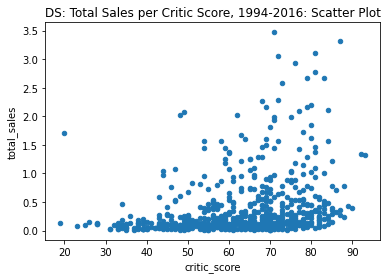

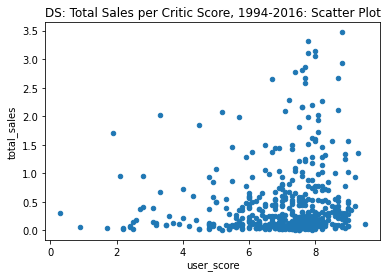

In [26]:
ds_critic = data.loc[(data['platform'] == 'DS') & (data['critic_score'] > 0)]
ds_user = data.loc[(data['platform'] == 'DS') & (data['user_score'] > 0)]

ds_critic.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('DS: Total Sales per Critic Score, 1994-2016: Scatter Plot')

ds_user.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('DS: Total Sales per Critic Score, 1994-2016: Scatter Plot')

print(ds_critic['critic_score'].corr(ds_critic['total_sales']))
print(ds_user['user_score'].corr(ds_user['total_sales']))

0.31949406685350046
0.24123733273773734


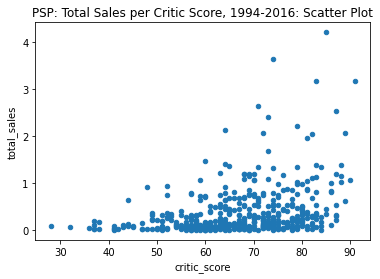

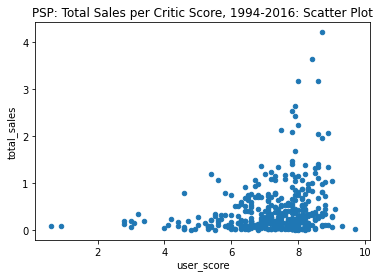

In [27]:
psp_critic = data.loc[(data['platform'] == 'PSP') & (data['critic_score'] > 0)]
psp_user = data.loc[(data['platform'] == 'PSP') & (data['user_score'] > 0)]

psp_critic.plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('PSP: Total Sales per Critic Score, 1994-2016: Scatter Plot')

psp_user.plot(x='user_score', y='total_sales', kind='scatter')
plt.title('PSP: Total Sales per Critic Score, 1994-2016: Scatter Plot')

print(psp_critic['critic_score'].corr(psp_critic['total_sales']))
print(psp_user['user_score'].corr(psp_user['total_sales']))

Weak direct correlation (from 0.26 to 0.4) between critic reviews and total sales can be seen among both more popular and less popular platforms. Total sales do not always correlate with user reviews, and when they do, there is a weak direct correlation (between 0.125 and 0.31). It's better to focus on critic reviews once trying to predict future sales.

Let's look at the distribution of total sales by genre

              total_sales
genre                    
Action            1243.62
Sports             911.41
Shooter            604.85
Misc               545.57
Role-Playing       517.69
Racing             465.83
Platform           403.68
Fighting           354.85
Simulation         291.10
Adventure          197.47
Strategy           149.34
Puzzle             132.22


Text(0.5, 1.0, 'Total Sales per Genre: 1994-2016')

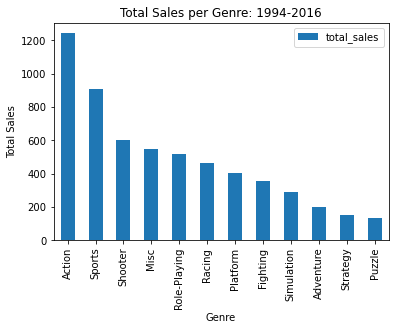

In [28]:
genre_pivot = data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
print(genre_pivot.sort_values(by='total_sales',ascending=False))

genre_pivot.sort_values(by='total_sales',ascending=False).plot(kind='bar').set(xlabel='Genre', ylabel='Total Sales')
plt.title('Total Sales per Genre: 1994-2016')

Action is the most popular genre (907.24 million copies sold) over 13 years of observation (1994 - 2016).
It is followed by Sports (602.06 million copies sold) and Shooter (503.92 million copies sold).
The most unpopular genres are Adventure (84.88 million), Strategy (73.51 million) and Puzzle (52.23 million).

# 6. User Portraits

Let's define for each region (NA, EU, JP):
<ol>
<li>Most popular platforms (top 5)</li>
<li>Most popular genres (top 5)</li>
<li>Does the ESRB rating affect sales in a particular region?</li>
</ol>

In [29]:
print('Top-5 platfroms in North America by total sales')
print(data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5))
print()
print('Топ-5 genres in North America by total sales')
print(data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5))
print('Top-5 ESRB categories in North America by total sales')
print()
print(data.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5))

Top-5 platfroms in North America by total sales
platform
PS2     466.70
X360    410.15
Wii     298.13
PS3     286.21
DS      284.11
Name: na_sales, dtype: float64

Топ-5 genres in North America by total sales
genre
Action     634.26
Sports     527.11
Shooter    332.02
Misc       288.10
Racing     249.86
Name: na_sales, dtype: float64
Top-5 ESRB categories in North America by total sales

rating
E       939.88
T       627.99
M       431.47
E10+    314.14
K-A       2.30
Name: na_sales, dtype: float64


In [30]:
print('Top-5 platfroms in Europe by total sales')
print(data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5))
print()
print('Топ-5 genres in Europe by total sales')
print(data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5))
print()
print('Top-5 ESRB categories in Europe by total sales')
print(data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5))

Top-5 platfroms in Europe by total sales
platform
PS2     263.82
PS3     205.79
X360    176.57
PS      146.95
Wii     126.54
Name: eu_sales, dtype: float64

Топ-5 genres in Europe by total sales
genre
Action     366.33
Sports     217.22
Shooter    189.87
Racing     151.04
Misc       136.28
Name: eu_sales, dtype: float64

Top-5 ESRB categories in Europe by total sales
rating
E       397.22
T       329.29
M       277.15
E10+    163.74
AO        0.61
Name: eu_sales, dtype: float64


In [31]:
print('Top-5 platfroms in Japan by total sales')
print(data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5))
print()
print('Топ-5 genres in Japan by total sales')
print(data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5))
print()
print('Top-5 ESRB categories in Japan by total sales')
print(data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5))

Top-5 platfroms in Japan by total sales
platform
PS2    111.53
PS     102.03
DS      97.46
PS3     65.86
PSP     64.42
Name: jp_sales, dtype: float64

Топ-5 genres in Japan by total sales
genre
Role-Playing    182.28
Action          120.19
Sports           83.86
Misc             69.31
Fighting         60.07
Name: jp_sales, dtype: float64

Top-5 ESRB categories in Japan by total sales
rating
T       107.59
E        92.86
M        44.48
E10+     31.08
AO        0.00
Name: jp_sales, dtype: float64


Top platforms and genres for each region over 13 years of observation can be seen above. <br>

The user profiles of North America and Europe are similar, NA and EU users prefer to play on PS2, X360, PS3 platforms and Action, Shooter, Sports.<br>

Users from Japan play on PS2, PS3 and DS and prefer Role-Playing, Action and Fighting genres.<br>

ESRB Game rating also affects sales. All popular games have one of 4 ratings T (for teens), E (for everyone), M (for adults) or E10+ (from 10 and up). But if in Europe and North America the most popular games are rated E (for everyone), then in Japan the most popular games are rated T - Teens.

# 7.1 Hypothesis Testing

*Null Hypothesis:* The average user ratings of Xbox One and PC platforms are the same.<br>
*Alternative Hypothesis:* The average user ratings of Xbox One and PC platforms are different.
    
The threshold value of alpha is 0.01 (99% accuracy)

In [32]:
data.drop(data[data['user_score'] == 0].index, inplace=True)

ps = data['platform'].isin(['PS','PS2','PS3','PSP','PS4','PSV'])
xbox = data['platform'].isin(['XOne','X360','XB'])
  
alpha = 0.01

results = st.ttest_ind(data[ps]['user_score'], data[xbox]['user_score'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject null hypothesis') 

p-value: 2.600707076324785e-10
Rejecting the null hypothesis


*Conclusion:* In 99% of cases the average user ratings of Xbox One and PC platforms are different

# 7.2 Hypothesis Testing

*Null Hypothesis:* The average user ratings for Actions and Sports are the same.<br>
*Alternative Hypothesis:* The average user ratings for Actions and Sports are different.
    
The threshold value of alpha is 0.01 (99% accuracy)

In [33]:
data.drop(data[data['user_score'] == 0].index, inplace=True)

action = data[data['genre']=='Action']
sports = data[data['genre']=='Sports']

alpha = 0.01

results = st.ttest_ind(action['user_score'], sports['user_score'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject null hypothesis') 

p-value: 0.21628830752649442
Failed to reject null hypothesis


*Conclusion:* In 99% of cases the average user ratings for Actions and Sports are the same

# 8. Conclusion and Recommendations

<ol>
<li>The data contains games in 12 genres and 8 age categories released on 31 platforms. <br>

<li>The distribution of the number of released games by year is similar to normal distribution.
The release peak falls on 2008-2009 (about 1400 games each).</li>

<li>The graphs show that total sales in popular platforms first grow, reach a peak, and then fall.
The life cycle of a gaming platform is 10-11 years. Platforms reach peak sales in 5-6 years.
New PS platforms are released every 6 years, just after the previous platform's peak sales has ended.</li>
    
<li>Sales peak for all platforms from our dataset has already passed in 2016, all platforms are falling and there are no promising platforms. The most popular platfroms in 2016 are PS4 (43.92 million copies) and XOne (23.50 million copies).</li>

<li>From 2011 to 2016, X360, XOne, PS4, PS3, and WiiU lead the global sales. And 3DS, PC, DS, PSP, PSV, PS2 are lagging behind. All platforms (except PS2) have successful games with abnormally high sales.</li>

<li>Weak direct correlation (from 0.21 to 0.41) between reviews and global sales is observed among both more popular and less popular platforms.</li>

<li>Action is the most popular genre (907.24 million copies sold) over 13 years of observation (1994 - 2016).
It is followed by Sports (602.06 million copies sold) and Shooter (503.92 million copies sold).
The most unpopular genres are Adventure (84.88 million), Strategy (73.51 million) and Puzzle (52.23 million).</li>

<li>North American and European user portraits are similar. Both those and others prefer PS2, X360, PS3 platforms and Action, Shooter and Sports genres. Japanese users play on PS2, PS3 and DS and prefer Role-Playing, Action and Fighting genres.</li>

<li>ESRB Game ratings also affect sales. All popular games have one of 4 ratings T (for teens), E (for everyone), M (for adults) or E10+ (from 10 and up). But while in Europe and North America the most popular games are rated E (for everyone), in Japan the most popular games are rated T - Teens.</li>

<li>In 99% of cases the average user ratings of the Xbox One and PC platforms are different</li>
    
<li>In 99% of cases the average user ratings of the Action and Sports genres are the same</li>
    
<li>If I worked for this online store in 2017, I would purchase and advertise games for X360, XOne, PS4, PS3 and WiiU in  Action, Sports and Shooter genres (with rating above E10 +) and would start preparing for the release of new XBox and Play Station platforms.</li>
    
</ol>